- By: @MarcosLaffitte 
https://github.com/MarcosLaffitte

- Proj2: Coronavirus Dynamics; ref: https://github.com/CSSEGISandData/COVID-19, up to march 19 2020

- Masters in Mathematics

- UNAM-IMATE, Juriquilla, Qro, Mex

- Course on Artificial Inteligence

- Prof: Esteban Hernandez Vargas, PhD

- Description: determine and evaluate models of coronavirus confirmed cases growth, considering cummulative data as net population of confirmed cases (exponential growth).

- Models:
        * 2nd degree polynomial
        * 3nd degree polynomial
        * 4nd degree polynomial
        * 5nd degree polynomial
        * exponential function

## Dependencies info

> scipy
  Version: 1.1.0
  Summary: SciPy: Scientific Library for Python
  Home-page: https://www.scipy.org

> seaborn
  Version: 0.9.0
  Summary: seaborn: statistical data visualization
  Home-page: https://seaborn.pydata.org

> numpy
  Version: 1.17.0
  Summary: NumPy is the fundamental package for array computing with Python.
  Home-page: https://www.numpy.org

> pandas
  Version: 0.25.1
  Summary: Powerful data structures for data analysis, time series, and statistics
  Home-page: http://pandas.pydata.org

> matplotlib
  Version: 3.0.2
  Summary: Python plotting package
  Home-page: http://matplotlib.org

> scikit-learn
  Version: 0.20.0
  Summary: A set of python modules for machine learning and data mining
  Home-page: http://scikit-learn.org

## Dependencies

In [1]:
# already in python
import math

# not in python
import numpy.polynomial.polynomial as poly
from scipy import stats
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# some weird stuff
%matplotlib inline
sns.set(rc={"figure.figsize":(11.7,8.27)})

## Variables

In [2]:
# input --------------------------------------------------------------------------------------------
# available countries: Italy, Japan, Spain, Germany, Iran, Mexico
theCountry = "Italy"

# constant -----------------------------------------------------------------------------------------
fileConfirmed = "time_series_19-covid-Confirmed.csv"
avilable = ["Italy", "Japan", "Spain", "Germany", "Iran", "Mexico"]
timeSteps = 58
time = list(range(timeSteps))

# control ------------------------------------------------------------------------------------------
if(not theCountry in avilable):
    theCountry = "Italy"


## Functions

In [3]:
# function: get data -------------------------------------------------------------------------------
def getDataFrom():
    # local variables
    theConfirmed = None
    theColumnHeaders = []
    firstColumn = ""
    secondColumn = ""
    thirdColumn = ""
    fourthColumn = ""
    theNa = []
    theInconsistenIndex = []
    colsConfirmed = []
    value = None
    # get data
    theConfirmed = pd.read_csv(fileConfirmed)
    # get intial columns
    theColumnHeaders = list(theConfirmed.columns.values)
    firstColumn = theColumnHeaders[0]
    secondColumn = theColumnHeaders[1]
    thirdColumn = theColumnHeaders[2]
    fourthColumn = theColumnHeaders[3]
    # get data from whole countries
    theConfirmed = theConfirmed.drop([firstColumn, thirdColumn, fourthColumn], axis = 1).set_index(secondColumn).transpose()
    theConfirmed = theConfirmed.loc[:, ~theConfirmed.columns.duplicated(keep = False)]
    theConfirmed = list(theConfirmed[theCountry].values)
    # end of function
    return(theConfirmed)

## Main

In [4]:
# get data
seriesConfirmed = getDataFrom()
seriesConfirmed = [val + 1 for val in seriesConfirmed]
naturalLogConfirmed = [np.log(val) for val in seriesConfirmed]

In [5]:
# train models
coefPoly2 = poly.polyfit(time, seriesConfirmed, 2)
coefPoly3 = poly.polyfit(time, seriesConfirmed, 3)
coefPoly4 = poly.polyfit(time, seriesConfirmed, 4)
coefPoly5 = poly.polyfit(time, seriesConfirmed, 5)
coefExp = poly.polyfit(time, naturalLogConfirmed, 1)

In [6]:
# obtaining predictions
myPoly2 = poly.Polynomial(coefPoly2)
myPoly3 = poly.Polynomial(coefPoly3)
myPoly4 = poly.Polynomial(coefPoly4)
myPoly5 = poly.Polynomial(coefPoly5)
myExp = poly.Polynomial(coefExp)
poly2Prediction = np.asarray([myPoly2(eachTime) for eachTime in time])
poly3Prediction = np.asarray([myPoly3(eachTime) for eachTime in time])
poly4Prediction = np.asarray([myPoly4(eachTime) for eachTime in time])
poly5Prediction = np.asarray([myPoly5(eachTime) for eachTime in time])
expPrediction = np.asarray([np.exp(myExp(eachTime)) for eachTime in time])

In [7]:
# obtain errors
# get RSS
poly2RSS = (1/2) * np.sum((seriesConfirmed - poly2Prediction)**2)
poly3RSS = (1/2) * np.sum((seriesConfirmed - poly3Prediction)**2)
poly4RSS = (1/2) * np.sum((seriesConfirmed - poly4Prediction)**2)
poly5RSS = (1/2) * np.sum((seriesConfirmed - poly5Prediction)**2)
expRSS = (1/2) * np.sum((seriesConfirmed - expPrediction)**2)
# get AICv
poly2AIC=len(seriesConfirmed)*math.log10(poly2RSS/len(seriesConfirmed))+2*len(coefPoly2)*len(seriesConfirmed)/(len(seriesConfirmed)-len(coefPoly2)-1)
poly3AIC=len(seriesConfirmed)*math.log10(poly3RSS/len(seriesConfirmed))+2*len(coefPoly3)*len(seriesConfirmed)/(len(seriesConfirmed)-len(coefPoly3)-1)
poly4AIC=len(seriesConfirmed)*math.log10(poly4RSS/len(seriesConfirmed))+2*len(coefPoly4)*len(seriesConfirmed)/(len(seriesConfirmed)-len(coefPoly4)-1)
poly5AIC=len(seriesConfirmed)*math.log10(poly5RSS/len(seriesConfirmed))+2*len(coefPoly5)*len(seriesConfirmed)/(len(seriesConfirmed)-len(coefPoly5)-1)
expAIC=len(seriesConfirmed)*math.log10(expRSS/len(seriesConfirmed))+2*len(coefExp)*len(seriesConfirmed)/(len(seriesConfirmed)-len(coefExp)-1)

## Results

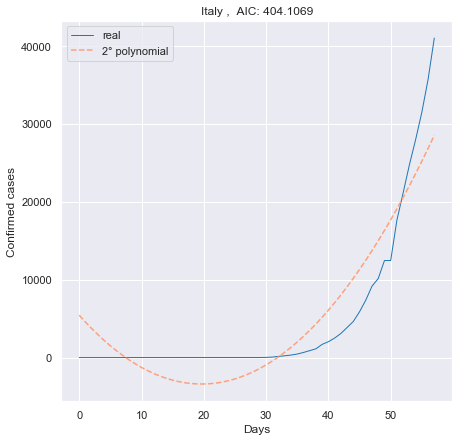

In [8]:
plt.figure(figsize = (7, 7))
plt.plot(seriesConfirmed, linewidth = 1, color = "tab:blue", label = "real")
plt.plot(poly2Prediction, linestyle = "--", linewidth = 1.5, color = "lightsalmon", label = "2° polynomial")
plt.ylabel("Confirmed cases")
plt.xlabel("Days")
plt.title(theCountry + " ,  AIC: " + str(round(poly2AIC, 4)))
plt.legend()
plt.show()

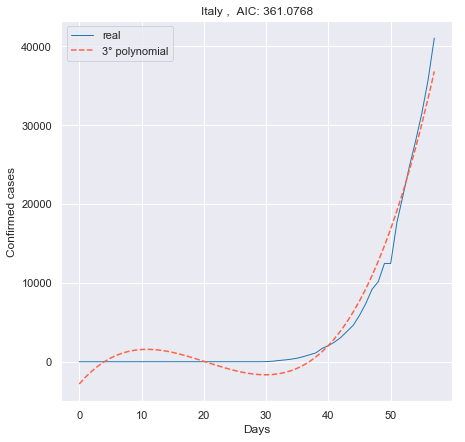

In [9]:
plt.figure(figsize = (7, 7))
plt.plot(seriesConfirmed, linewidth = 1, color = "tab:blue", label = "real")
plt.plot(poly3Prediction, linestyle = "--", linewidth = 1.5, color = "tomato", label = "3° polynomial")
plt.ylabel("Confirmed cases")
plt.xlabel("Days")
plt.title(theCountry + " ,  AIC: " + str(round(poly3AIC, 4)))
plt.legend()
plt.show()

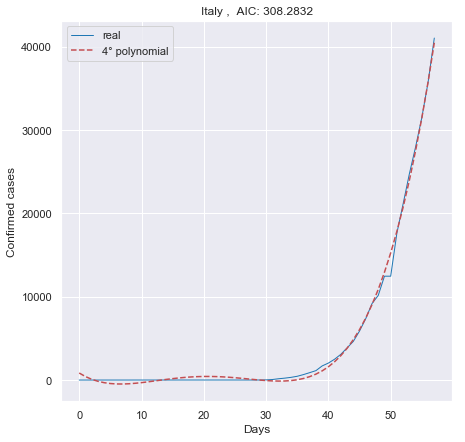

In [10]:
plt.figure(figsize = (7, 7))
plt.plot(seriesConfirmed, linewidth = 1, color = "tab:blue", label = "real")
plt.plot(poly4Prediction, linestyle = "--", linewidth = 1.5, color = "r", label = "4° polynomial")
plt.ylabel("Confirmed cases")
plt.xlabel("Days")
plt.title(theCountry + " ,  AIC: " + str(round(poly4AIC, 4)))
plt.legend()
plt.show()

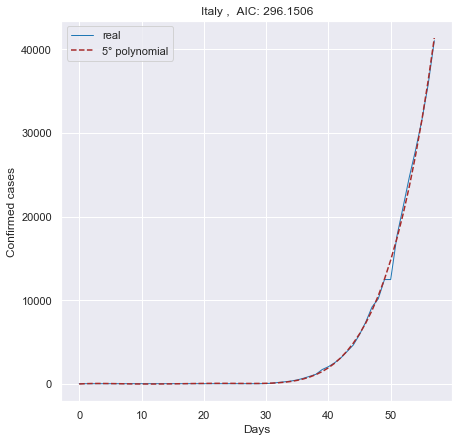

In [11]:
plt.figure(figsize = (7, 7))
plt.plot(seriesConfirmed, linewidth = 1, color = "tab:blue", label = "real")
plt.plot(poly5Prediction, linestyle = "--", linewidth = 1.5, color = "brown", label = "5° polynomial")
plt.ylabel("Confirmed cases")
plt.xlabel("Days")
plt.title(theCountry + " ,  AIC: " + str(round(poly5AIC, 4)))
plt.legend()
plt.show()

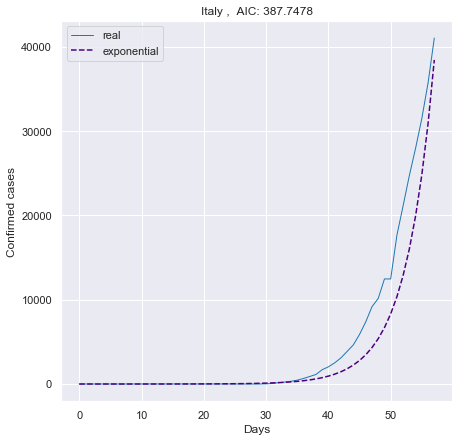

In [12]:
plt.figure(figsize = (7, 7))
plt.plot(seriesConfirmed, linewidth = 1, color = "tab:blue", label = "real")
plt.plot(expPrediction, linestyle = "--", linewidth = 1.5, color = "indigo", label = "exponential")
plt.ylabel("Confirmed cases")
plt.xlabel("Days")
plt.title(theCountry + " ,  AIC: " + str(round(expAIC, 4)))
plt.legend()
plt.show()